# Goodreads data-analysis



In [116]:
import pandas as pd
from collections import defaultdict
import re
import matplotlib.pyplot as plt

In [117]:
df = pd.read_csv('data/Book_Details.csv')

First and foremost, we need to get an overview of the data, it's shape and how a normal row looks like.

In [118]:
df.info()
for column in df.columns:
    print(column)
df.iloc[[2]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16225 non-null  int64  
 1   book_id              16225 non-null  int64  
 2   cover_image_uri      16225 non-null  object 
 3   book_title           16225 non-null  object 
 4   book_details         16177 non-null  object 
 5   format               16225 non-null  object 
 6   publication_info     16225 non-null  object 
 7   authorlink           16225 non-null  object 
 8   author               16225 non-null  object 
 9   num_pages            16225 non-null  object 
 10  genres               16225 non-null  object 
 11  num_ratings          16225 non-null  int64  
 12  num_reviews          16225 non-null  int64  
 13  average_rating       16225 non-null  float64
 14  rating_distribution  16225 non-null  object 
dtypes: float64(1), int64(4), object(10)


Unnamed: 0  book_id                                    cover_image_uri  \
2           2        3  https://images-na.ssl-images-amazon.com/images...   

                              book_title  \
2  Harry Potter and the Sorcerer's Stone   

                                        book_details  \
2  Harry Potter has no idea how famous he is. Tha...   

                     format                   publication_info  \
2  ['309 pages, Hardcover']  ['First published June 26, 1997']   

                                          authorlink        author num_pages  \
2  https://www.goodreads.com/author/show/1077326....  J.K. Rowling   ['309']   

                                              genres  num_ratings  \
2  ['Fantasy', 'Fiction', 'Young Adult', 'Magic',...     10116247   

   num_reviews  average_rating  \
2       163493            4.47   

                                 rating_distribution  
2  {'5': '6,544,542', '4': '2,348,390', '3': '856...

The following cell generates a dictionary of all genres present in the dataset as keys with their respective number of times said genre showed up in the data, percentage-wise, as values.

After that, we can look up most or least used genres in the dataset. In th next step, we want to get an overview of the percentages regarding genres. We can also plot them via matplotlib. All of this happens inside a function because we need this exact code later on.

In [119]:
def get_genre(df, name):
    genre_dict = defaultdict(lambda: 0)
    for entry in df['genres']:
        big_string = ''.join(entry)
        matches = re.findall(r"'(.*?)'", big_string)
        for genre in matches:
            genre_dict[genre] += 1
            
    sorted_dict = {k: v for k, v in sorted(genre_dict.items(), key=lambda item: item[1], reverse=True)}
    list_from_dict = [(k,v) for k,v in sorted_dict.items()]
    labels_and_sizes = {}
    
    print("Top 10 genres:\n")
    for i in range(10):
        print(f"{i + 1}. ", list_from_dict[i][0], f"\t({list_from_dict[i][1]} mentions in the dataset)")
        labels_and_sizes[list_from_dict[i][0]] = list_from_dict[i][1]
        
    amount_of_genres = len(df[df['genres'] != "''"])
    labels = []
    sizes = []
    percent_dict = {}
    
    for label, size in labels_and_sizes.items():
        percent_size = round((size / amount_of_genres) * 100, 2)
        labels.append(label)
        sizes.append(percent_size)
        percent_dict[label] = percent_size
    fig, ax = plt.subplots(figsize=(10, 7))
    bars = ax.bar(labels, sizes)
    for bar, value in zip(bars, labels_and_sizes.values()):
        height = bar.get_height()
        percentage = (value / amount_of_genres) * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{percentage:.1f}%\n({value})',
            ha='center',
            va='bottom'
        )
    plt.xlabel('Genres')
    plt.ylabel('Percentage')
    plt.title(f'percentage share of genres in the dataset {name}')
    plt.xticks(rotation=45)
    plt.show()
    
    return percent_dict

Top 10 genres:

1.  Fiction 	(11453 mentions in the dataset)
2.  Fantasy 	(5111 mentions in the dataset)
3.  Romance 	(3787 mentions in the dataset)
4.  Young Adult 	(3505 mentions in the dataset)
5.  Classics 	(3214 mentions in the dataset)
6.  Nonfiction 	(2756 mentions in the dataset)
7.  Historical Fiction 	(2725 mentions in the dataset)
8.  Mystery 	(2629 mentions in the dataset)
9.  Contemporary 	(2572 mentions in the dataset)
10.  Novels 	(2190 mentions in the dataset)


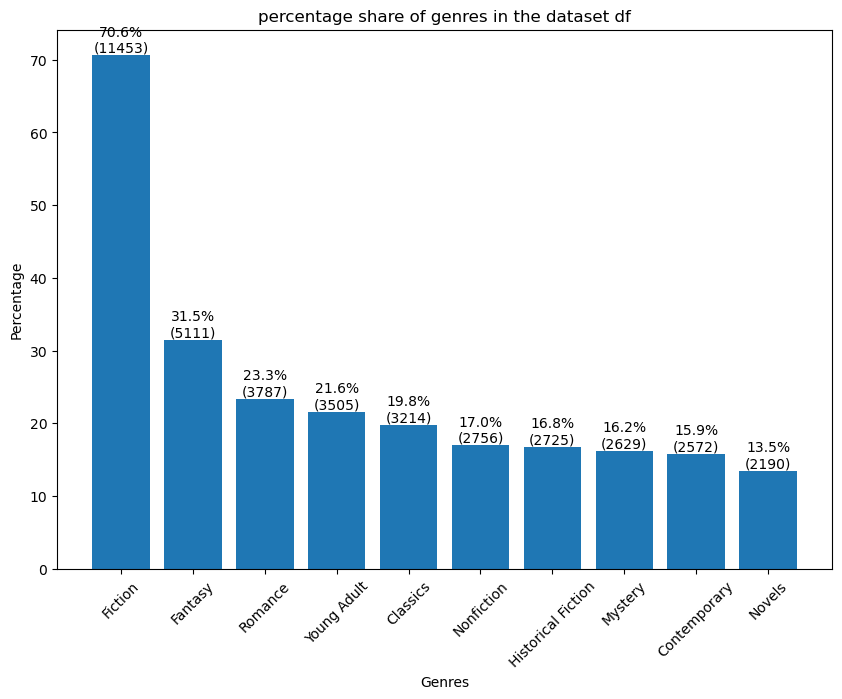

In [120]:
l_and_s_df = get_genre(df, 'df')

After this, we want to do the same kind of analysis, but for the books that are highly rated. For this example, we will take every book that satisfies two conditions.

1. The average rating of the book is 4.5 or higher
2. The number of ratings the book has received is 100 or higher

Top 10 genres:

1.  Fiction 	(604 mentions in the dataset)
2.  Fantasy 	(408 mentions in the dataset)
3.  Young Adult 	(235 mentions in the dataset)
4.  Romance 	(216 mentions in the dataset)
5.  Nonfiction 	(203 mentions in the dataset)
6.  Adventure 	(168 mentions in the dataset)
7.  Audiobook 	(150 mentions in the dataset)
8.  Classics 	(150 mentions in the dataset)
9.  Historical Fiction 	(143 mentions in the dataset)
10.  Historical 	(107 mentions in the dataset)


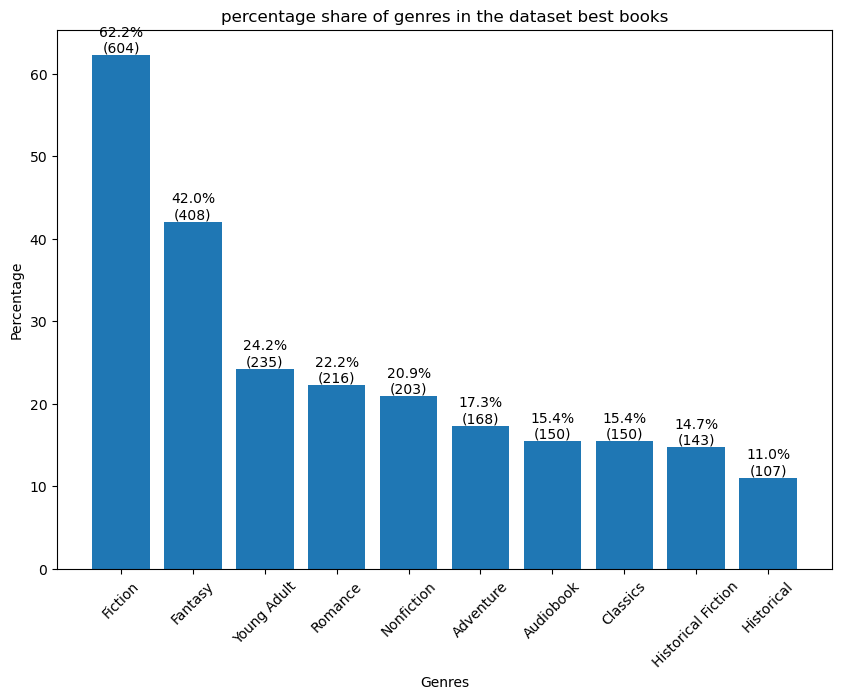

In [121]:
best_books = df[(df['average_rating'] > 4.4) & (df['num_ratings'] > 99)]
l_and_s_bb = get_genre(best_books, "best books")

In [122]:
combined_dict = {}

for bb_key, bb_value in l_and_s_bb.items():
    if bb_key in l_and_s_df:
        if bb_value < l_and_s_df[bb_key]:
            rounded_value = round(l_and_s_df[bb_key] - bb_value, 2)
            print(f"The genre {bb_key} occurs {rounded_value}% less often in the best books than in the entirety of the books on goodreads.")
            combined_dict[bb_key] = -abs(rounded_value)
        elif bb_value > l_and_s_df[bb_key]:
            rounded_value = round(bb_value - l_and_s_df[bb_key], 2)
            print(f"The genre {bb_key} occurs {rounded_value}% more often in the best books than in the entirety of the books on goodreads.")
            combined_dict[bb_key] = abs(rounded_value)
        else:
            print(f"The genre {bb_key} occurs exactly as often in the best books on goodreads as it does in the books overall.")
        
    else: 
        print(f"The genre {bb_key} is only in the top 10 genres of the best books and not in the top 10 genres of books overall.")

The genre Fiction occurs 8.39% less often in the best books than in the entirety of the books on goodreads.
The genre Fantasy occurs 10.52% more often in the best books than in the entirety of the books on goodreads.
The genre Young Adult occurs 2.6% more often in the best books than in the entirety of the books on goodreads.
The genre Romance occurs 1.09% less often in the best books than in the entirety of the books on goodreads.
The genre Nonfiction occurs 3.92% more often in the best books than in the entirety of the books on goodreads.
The genre Adventure is only in the top 10 genres of the best books and not in the top 10 genres of books overall.
The genre Audiobook is only in the top 10 genres of the best books and not in the top 10 genres of books overall.
The genre Classics occurs 4.36% less often in the best books than in the entirety of the books on goodreads.
The genre Historical Fiction occurs 2.07% less often in the best books than in the entirety of the books on goodread

And now we can make a last, combined graph that shows the positive and negative percentages of genres from the best books in comparison to the overall books on goodread.

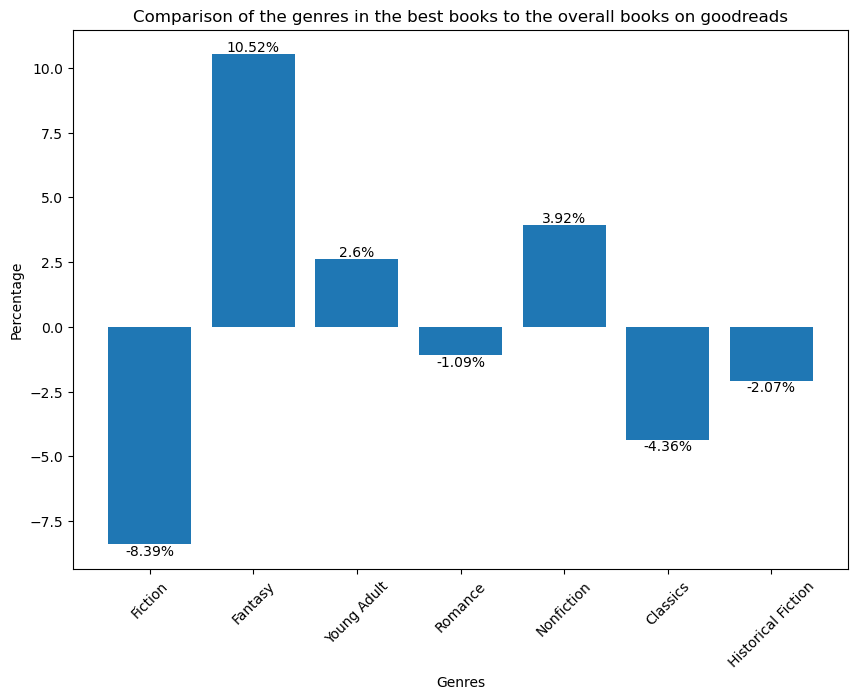

In [123]:
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(combined_dict.keys(), combined_dict.values())
for bar, value in zip(bars, combined_dict.values()):
    height = bar.get_height()
    if value >= 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{value}%',
            ha='center',
            va='bottom'
        )
    else:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{value}%',
            ha='center',
            va='top'
        )
plt.xlabel('Genres')
plt.ylabel('Percentage')
plt.title('Comparison of the genres in the best books to the overall books on goodreads')
plt.xticks(rotation=45)
plt.show()